In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from src.black_scholes import black_scholes_price

In [ ]:
def binomial_option_price(S0, K, T, r, sigma, N, option_type="call", american=False):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    discount = np.exp(-r * dt)

    ST = np.array([S0 * (u ** j) * (d ** (N - j)) for j in range(N + 1)])

    if option_type == "call":
        option_vals = np.maximum(ST - K, 0)
    else:
        option_vals = np.maximum(K - ST, 0)

    for i in range(N - 1, -1, -1):
        ST = ST[:i + 1] / u
        option_vals = discount * (p * option_vals[1:i+2] + (1 - p) * option_vals[0:i+1])

        if american:
            if option_type == "call":
                exercise = np.maximum(ST - K, 0)
            else:
                exercise = np.maximum(K - ST, 0)
            option_vals = np.maximum(option_vals, exercise)

    return option_vals[0]

In [ ]:
S0 = 100
K = 100
T = 1.0
r = 0.05
sigma = 0.2
N = 100

euro_call = binomial_option_price(S0, K, T, r, sigma, N, option_type="call", american=False)
amer_call = binomial_option_price(S0, K, T, r, sigma, N, option_type="call", american=True)

euro_put = binomial_option_price(S0, K, T, r, sigma, N, option_type="put", american=False)
amer_put = binomial_option_price(S0, K, T, r, sigma, N, option_type="put", american=True)

bsm_call = black_scholes_price(S0, K, T, r, sigma, option_type="call")
bsm_put = black_scholes_price(S0, K, T, r, sigma, option_type="put")

print(f"European Call (Binomial): ₹{euro_call:.4f}")
print(f"American Call (Binomial): ₹{amer_call:.4f}")
print(f"European Call (BSM):      ₹{bsm_call:.4f}")
print()
print(f"European Put (Binomial): ₹{euro_put:.4f}")
print(f"American Put (Binomial): ₹{amer_put:.4f}")
print(f"European Put (BSM):      ₹{bsm_put:.4f}")

European Call (Binomial): ₹10.4306
American Call (Binomial): ₹10.4306
European Call (BSM):      ₹10.4506

European Put (Binomial): ₹5.5536
American Put (Binomial): ₹98.1684
European Put (BSM):      ₹5.5735


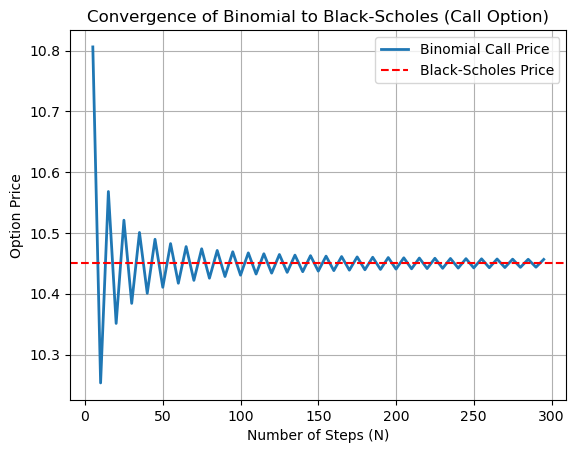

In [7]:
steps = np.arange(5, 300, 5)
binomial_vals = [binomial_option_price(S0, K, T, r, sigma, N=n, option_type="call") for n in steps]
bs_price = black_scholes_price(S0, K, T, r, sigma, option_type="call")

plt.plot(steps, binomial_vals, label="Binomial Call Price", linewidth=2)
plt.axhline(bs_price, color='red', linestyle='--', label="Black-Scholes Price")
plt.title("Convergence of Binomial to Black-Scholes (Call Option)")
plt.xlabel("Number of Steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.legend()
plt.savefig("binomial_vs_bsm_call.png")
plt.show()

- Binomial pricing matches BSM for European options as N → ∞
- American call = European call (no early exercise)
- American puts are more valuable due to early exercise